In [2]:
import cv2 as cv

from matplotlib import pyplot as plt
import numpy as np

#For downloading the images
import requests, zipfile, io

In [3]:
#Downloading the example images
r = requests.get("https://github.com/cluel01/DAIN-example/blob/main/images/images.zip?raw=true")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [5]:
forest = cv.imread("./forest.jpg")

ocean = cv.imread("./ocean.jpg")

rose = cv.imread("./rose.jpg")

forest2 = cv.imread("./forest2.jpg")

images = [forest,ocean,rose,forest2]

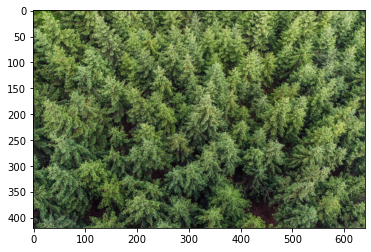

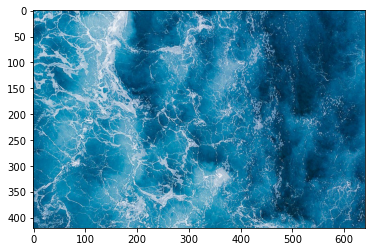

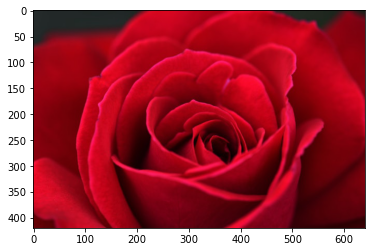

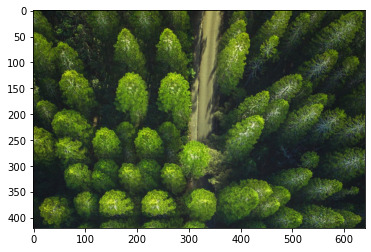

In [6]:
for img in images:
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

In [44]:
hists = []
num_channels = 3

for img in images:
    h=[]
    for i in range(num_channels):   
        arr = cv.calcHist([img],[i],None,[256],[0,256]).flatten()
        arr = cv.normalize(arr,arr,norm_type=cv.NORM_MINMAX)
        h.append(arr)
    hists.append(np.stack(h))
hists= np.stack(hists)

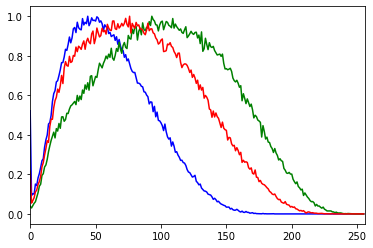

In [40]:
#RGB Histograms for image at idx 0 (forest)
a = hists[0]
colors = ["b","g","r"]
for i,col in enumerate(colors):
    plt.plot(a[i],color = col)
    plt.xlim([0,256])
plt.show()

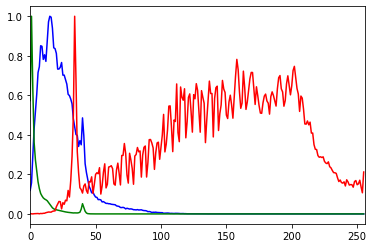

In [37]:
#RGB Histograms for image at idx 2 (rose)
a = hists[2]
colors = ["b","g","r"]
for i,col in enumerate(colors):
    plt.plot(a[i],color = col)
    plt.xlim([0,256])
plt.show()

In [93]:
#Methods 
#0: Correlation 
#1: ChiSquare
#2: Intersection
#3: Bhattacharyya distance
method=0

for i in range(len(images)):
    score = cv.compareHist(hists[0],hists[i],method)
    print("Image 0 and {} have the score: {}".format(i,score))

Image 0 and 0 have the score: 1.0
Image 0 and 1 have the score: 0.013335195022330272
Image 0 and 2 have the score: 0.04379124361281926
Image 0 and 3 have the score: 0.623989908168888


In [119]:
#Or using self-developed functions
def correlation(histA,histB):
    m_a = np.mean(histA)
    m_b = np.mean(histB)
    cor = np.sum([(a-m_a)*(b-m_b) for a,b in zip(histA,histB)]) / np.sqrt(np.sum([(a-m_a) ** 2 for a in histA]) * np.sum([(b-m_b)**2 for b in histB]))
    return cor

def chi2_distance(histA,histB,eps=1e-10):
    d = 0.5 * np.sum([ (a-b)**2 / (a+b+eps) for a,b in zip(histA,histB)])
    return d

def euc_distance(histA,histB):
    d = np.sum([(a-b)**2 for a,b in zip(histA,histB)])**0.5
    return d

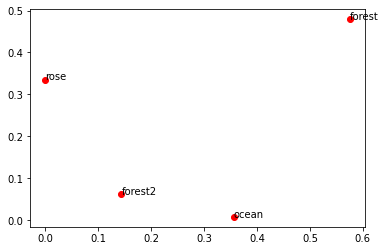

In [60]:
img_feat = np.mean(hists,axis=2)

fig, ax = plt.subplots()
ax.scatter(img_feat[:,1],img_feat[:,2],c="r")

labels=["forest","ocean","rose","forest2"]
for i, txt in enumerate(labels):
    ax.annotate(txt, (img_feat[i,1],img_feat[i,2]))